Q63. 네이버 검색에서 관심 주제와 기사 수를 입력하면 그만큼 출력하는 크롤링 프로그램을 작성하여 다음 사항을 수행하세요.

기사 제목과 링크를 데이터프레임으로 가져온 후 본문 내용에서 한글 단어만 출력하여 형태소 분석 최근 국내 'AI'와 관련하여 가장 많이 언급되는 단어에 대한 빈도분석 및 시각화 AI 분야에서의 유의할 만한 트랜드 정보 및 인사이트 도출

In [ ]:
#불용어처리 - 빈도분석 - 시각화 - 워드클라우드

In [ ]:
# url = https://search.naver.com/search.naver?where=news&sm=tab_jum&query=

## 네이버뉴스 + 개별신문사 코드 만들기 

In [13]:
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd

global news_df

def News():
    global news_df
    
    keyword = input('검색 키워드를 입력해주세요 ')
    keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    num = int(input('추출할 뉴스기사의 숫자를 입력해주세요 '))
    
    news_df = pd.DataFrame(columns=['title','url']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+keyword+'&start='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser') ##html_doc 데이터를 html.parser로 파싱한 뒤 BeautifulSoup 객체를 생성해서 bs 변수에 넣음 
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text.get('href')
            # news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

News()

검색 키워드를 입력해주세요  도서관
추출할 뉴스기사의 숫자를 입력해주세요  1


,title,url
0,"목포시립도서관, 리모델링 후 재개관…쾌적한 독서공간 조성",http://www.newsis.com/view/?id=NISX20220816_00...


In [14]:
# 중복행 제거
dup = news_df.duplicated(['title'], keep='first')
dup

0    False
dtype: bool

In [15]:
news_df = news_df.drop_duplicates(['title'], keep='first') # 첫번째만 남기기
news_df

,title,url
0,"목포시립도서관, 리모델링 후 재개관…쾌적한 독서공간 조성",http://www.newsis.com/view/?id=NISX20220816_00...


In [16]:
# 리스트 li에 항상 마지막 기사만 들어가게 되어있어서 그부분 수정했어요 

headers = {"user-agent":'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36'}

import requests
import re 

def news_contents_crawler(news_url):
    li = []
    for i in news_url: 
        try:
            news = requests.get(i, headers=headers)
            news_html = BeautifulSoup(news.text,"html.parser")
        except:
            pass

        texts = news_html.find_all('p')

        for t in texts:
            text = t.get_text()
            text = re.sub('[^가-힣]+',' ', text)

            li.append(text)
            
    li = ' '.join(li)
    result = re.sub('\s{2,}', ' ', li)
    return result

news_li = news_df['url'].tolist()
result = news_contents_crawler(news_li)
result    

' 화 서울 지방 목포시립도서관 리모델링 후 재개관 쾌적한 독서공간 조성 등록 기사내용 요약 전체 외벽 교체 자가대출반납기기 설치 전체 외벽공사 마친 목포시립도서관 목포시 제공 재판매 및 금지 전체 외벽공사 마친 목포시립도서관 목포시 제공 재판매 및 금지 새로운 모습으로 바뀐 목포시립도서관 실내 열람실 목포시 제공 재판매 및 금지 새로운 모습으로 바뀐 목포시립도서관 실내 열람실 목포시 제공 재판매 및 금지 무단 전재 및 재배포 금지 뉴시스 기획특집 돌아온 이재용 주거 사각 반지하 취임 일 오피니언 배우 주원 액션스타가 된 미소년 공개 동시 비영어 위 고은결 기자 부채 중독에 젖은 한전 전기료 인상이 답일까 뉴시스 고 변중석 여사 주기 범현대가 한자리에 빌 게이츠 접견한 윤석열 대통령 민주당 당헌 조 개정 놓고 논의 의총서 재신임 된 권성동 어깨가 무겁다 기회 준 의원들께 감사 이시간 핫 뉴스 오늘의 헤드라인 정부 첫 검찰총장 후보 명 압축 모두 특수통 출신에 서오남 탈피 최근 검찰 인사에 이어 검찰총장 인선 과정에서도 이른바 특수통 검사들이 강세를 나타냈다 검찰 수장도 특수통으로 임명될 것이 유력해지면서 특수통 전성기 가 한동안 이어질 전망이다 기대와는 달리 여성 후보자는 이름을 올리지 못했지만 출신 지역과 대학 측면에서 다양성을 확보했다 명 모두 검찰 내부에서 신임이 두텁고 능력을 인정받은 검사들인 이준석 비대위원에 윤핵관 연 있는 분들 물러나야 이재명 박용진 첫 맞짱토론서 방탄 신경전 정부 게이츠 재단과 보건 협력 강화 협약 부여 실종 명 숨진채 발견 주택 등 침수 만 동 오후 시까지 만 명 확진 주만에 만명대 원희룡 초과이익 적정수준 환수 반지하 실태조사 경찰청 음주운전 총경 교통과장 발령냈다가 번복 많이 본 기사 유빈 성형외과 의사와 럭셔리 데이트 연애는 직진 가수 유빈이 성형외과 의사 김지훈과 올나잇 데이트 가 이어진다 일 오후 시 분 방송되는 예능 연애는 직진 에서는 유빈과 성형외과 의사 김지훈이 단독 데이트에 나서고 싱글즈 인에게 파장을 몰고 온 

In [17]:
!pip install konlpy wordcloud

In [19]:
#konlpy(코엔엘파이) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(result) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word=[]
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)
        

count = Counter(noun_list) #단어별 숫자세주기

In [25]:
#most_common() > 데이터의 개수가 많은 순으로 정렬된 배열을 리턴하는 메서드
#인자로 숫자 n을 넘기면 그 숫자 만큼만 리턴하기 때문에, 가장 개수가 많은 n개의 데이터를 얻을 수도 있습니다.
#(글자, 나온 횟수)를 요소로 가진 리스트를 반환함
data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df = pd.DataFrame(series, columns=['cnt'])

df = df.reset_index()
df

,index,cnt
0,데이트,17
1,모습,11
2,유빈,11
3,주기,9
4,지난,9
...,...,...
758,모든,1
759,콘텐츠,1
760,저작권법,1
761,보호,1


In [88]:
# 한글폰트 사용
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Password:
sudo: a password is required
Password:
sudo: a password is required
rm: /Users/thing/.cache/matplotlib: No such file or directory
rm: -rf: No such file or directory


<AxesSubplot:xlabel='index', ylabel='cnt'>

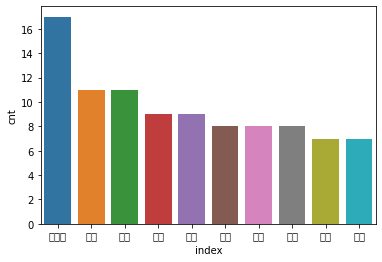

In [26]:
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='NanumBarunGothic')# 한글 폰트 설정

# 시각화
sns.barplot(x='index', y='cnt', data=data10, orient='v')

(-0.5, 3999.5, 2999.5, -0.5)

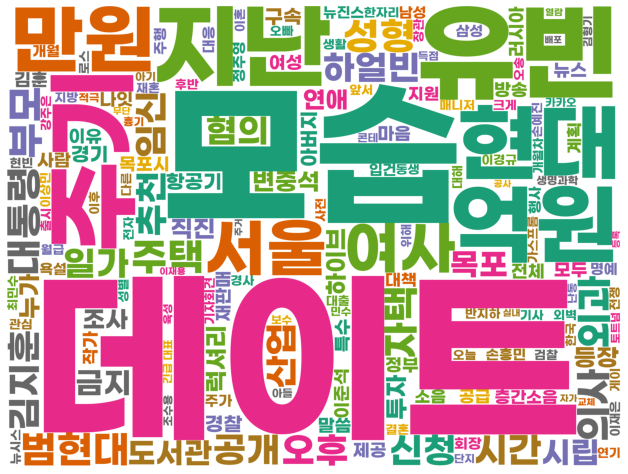

In [24]:
from wordcloud import WordCloud

#generate_from_frequencies 미리 정의된 단어의 빈도수 dict를 이용하여 워드 클라우드를 그림
#  워드 클라우드를 generate할 때 마다 스타일이 미세하게 다르게 형성되는데,random_state 인자를 지정해주면 생성할 때마다 완전히 동일한 결과
wordcloud = WordCloud(font_path='GmarketSansTTFBold.ttf', width= 4000, 
                      height = 3000, random_state=1, background_color='white', 
                      colormap='Dark2', max_words=161).generate_from_frequencies(data)
plt.figure(figsize = (11, 11))
plt.imshow(wordcloud) #이미지 표시
plt.axis('off') #축 지우기